In [ ]:
import numpy as np
import os
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt


image_dir = "C:\\Users\\crazy\\Downloads\\archive\\img_align_celeba\\10000"
img_width, img_height = 64, 64

# 이미지 목록 가져오기
image_files = os.listdir(image_dir)

# 이미지를 NumPy 배열로 로드하고 크기 조절
images = []
for filename in image_files:
    img = load_img(os.path.join(image_dir, filename), target_size=(img_width, img_height))
    img = img_to_array(img)
    img = img / 255.0  # 이미지 정규화
    images.append(img)

images = np.array(images)

# plt.imshow(images[0])

In [ ]:
# Latent 공간의 차원 설정
latent_dim = 100

# 인코더 정의
input_img = Input(shape=(img_width, img_height, 3))
x = Flatten()(input_img)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
z_mean = Dense(latent_dim)(x)
z_log_var = Dense(latent_dim)(x)

# 잠재 공간 샘플링 함수 정의
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.0)
    return z_mean + K.exp(z_log_var / 2) * epsilon

z = Lambda(sampling)([z_mean, z_log_var])

# 디코더 정의
decoder_input = Input(shape=(latent_dim,))
x = Dense(128, activation='relu')(decoder_input)
x = Dense(256, activation='relu')(x)
x = Dense(img_width * img_height * 3, activation='sigmoid')(x)
x = Reshape((img_width, img_height, 3))(x)

# 전체 오토인코더 모델 정의
encoder = Model(input_img, z)
decoder = Model(decoder_input, x)
autoencoder_output = decoder(encoder(input_img))
autoencoder = Model(input_img, autoencoder_output)


In [ ]:
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# 학습 데이터 설정
X_train = images

for i in range(1000):
    # 모델 학습
    autoencoder.fit(X_train, X_train, epochs=1, batch_size=1000, verbose=1)
    # 잠재 공간에서 무작위 샘플링
    num_samples = 10
    latent_samples = np.random.normal(size=(num_samples, latent_dim))

    # 생성된 얼굴 이미지 디코딩
    generated_faces = decoder.predict(latent_samples)

    # 생성된 얼굴 이미지 시각화
    plt.figure(figsize=(12, 6))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(generated_faces[i])
        plt.axis('off')
    plt.show()
    i += 1



In [1]:
import tensorflow as tf



# GPU 디바이스 목록 가져오기

gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    print("사용 가능한 GPU 디바이스:")
    for gpu in gpus:
        print("디바이스 이름:", gpu.name)
else:
    print("사용 가능한 GPU 디바이스가 없습니다.")

# GPU 메모리 제한 설정
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         # GPU 메모리의 1/4만 사용하도록 설정
#         tf.config.experimental.set_virtual_device_configuration(
#             gpus[0],
#             [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
#     except RuntimeError as e:
#         print(e)

# # # CPU 사용 설정
# tf.config.experimental.set_visible_devices([], 'GPU')


사용 가능한 GPU 디바이스:
디바이스 이름: /physical_device:GPU:0


In [2]:
###이미지 전처리 코드

import os
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

image_dir = "C:\\Users\\crazy\\Downloads\\archive\\img_align_celeba\\10000"
# image_dir = "C:\\Myfolder\\AI_tools\\dfl\\df_NVIDIA_RTX3000_series\\workspace\\data_src\\aligned"
# image_dir = "C:\\Myfolder\\AI_tools\\sd.webui\\this\\fun\\image"
# image_dir = "C:\\Users\\crazy\Downloads\\archive\\img_align_celeba\\facesetav"

crop_width, crop_height = 1024, 1024  # 자를 크기
resize_width, resize_height = 128, 128  # 변경할 크기

# 이미지 목록 가져오기
image_files = os.listdir(image_dir)

# 이미지를 NumPy 배열로 로드하고 중앙에서 자르고 크기 변경하기
images = []
for filename in image_files:
    img = tf.keras.preprocessing.image.load_img(os.path.join(image_dir, filename))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0  # 이미지 정규화

    # 중앙에서 자르기
    center_x = img.shape[1] // 2
    center_y = img.shape[0] // 2
    half_width = crop_width // 2
    half_height = crop_height // 2
    cropped_img = img[center_y - half_height:center_y + half_height, center_x - half_width:center_x + half_width, :]

    # 크기 변경
    resized_img = tf.image.resize(cropped_img, (resize_width, resize_height))

    images.append(resized_img)

images = np.array(images)


# 이미지 중에서 무작위로 하나 선택
random_index = random.randint(0, len(images) - 1)
selected_image = images[random_index]

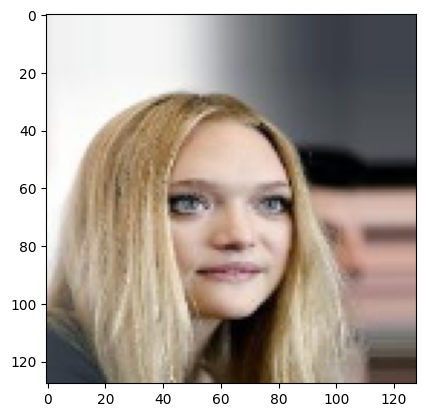

In [3]:
# 선택한 이미지 표시
plt.imshow(selected_image)
plt.show()

In [4]:
import tensorflow as tf
import numpy as np  # 추가로 넣어줘야 함

# 코드의 편의성을 위해 정의
K = tf.keras
layers = K.layers

# 인코더 시작
encoder_input = layers.Input(shape=(resize_width, resize_height, 3), name='encoder_input')
x = layers.Conv2D(32, (5, 5), 2, activation='relu', padding='same')(encoder_input)
x = layers.Conv2D(64, (4, 4), 2, activation='relu', padding='same')(x)
x = layers.Conv2D(128, (3, 3), 2, activation='relu', padding='same')(x)
shape_before_flattening = x.shape[1:]
x = layers.Flatten()(x)

# Reparam trick
# 잠재 공간의 차원을 2로 설정하고 정규 분포를 사용하여 샘플링합니다.
z_mean = layers.Dense(2, name='z_mean')(x)
z_log_var = layers.Dense(2, name='z_log_var')(x)

# 잠재 공간 샘플링 함수
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], 2), mean=0.0, stddev=1.0)
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, name='z')([z_mean, z_log_var])
encoder = K.models.Model(encoder_input, [z_mean, z_log_var, z], name='encoder')

# 디코더 시작
decoder_input = layers.Input(shape=(2,), name='decoder_input')
x = layers.Dense(np.prod(shape_before_flattening))(decoder_input)
x = layers.Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(128, (3, 3), 2, activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(64, (4, 4), 2, activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(32, (5, 5), 2, activation='relu', padding='same')(x)
decoder_output = layers.Conv2DTranspose(3, (3, 3), 1, activation='sigmoid', padding='same')(x)
decoder = K.models.Model(decoder_input, decoder_output, name='decoder')

def total_loss(p, q):
    """
    KL 발산과 CEE 손실을 계산하고 합산하는 메소드.
    :return: 합산된 손실
    """
    epsilon = 1e-10  # 아주 작은 값

    # KL 발산 계산
    kl_divergence = 500 * K.backend.sum(p * K.backend.log(p / q + epsilon), axis=-1)

    # CEE 손실 계산
    cross_entropy_error = 0-.5 * -K.backend.sum(p * K.backend.log(q + epsilon), axis=-1)

    alpha = 0.01
    # KL 발산과 CEE 손실의 합 계산
    total_loss = alpha * kl_divergence + (1-alpha) * cross_entropy_error

    return total_loss, kl_divergence, cross_entropy_error


# VAE 모델 정의 (인코더와 디코더 연결)
vae_input = encoder_input
vae_output = decoder(z)
vae = K.models.Model(vae_input, vae_output, name='vae')
vae.compile(optimizer='adam', loss=total_loss)

vae.summary()

Model: "vae"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 32)   2432        ['encoder_input[0][0]']          
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 64)   32832       ['conv2d[0][0]']                 
                                                                                                  
 conv2d_2 (Conv2D)              (None, 16, 16, 128)  73856       ['conv2d_1[0][0]']             

### 학습 출력

In [5]:
import datetime


vae.fit(images,
        images,
        batch_size=100,
        epochs=10)

image_to_predict = selected_image[np.newaxis, ...]

    # 예측 수행
predicted_image = vae.predict(image_to_predict)

    # 현재 시각을 포함한 파일 이름 생성
current_time = datetime.datetime.now()
timestamp = current_time.strftime("%Y%m%d%H%M%S")
save_path = f'predicted_image_{timestamp}.png'

    # 이미지를 파일로 저장
plt.imshow(predicted_image[0])
plt.savefig(save_path)
plt.close()  # 이미지 플롯 닫기

print(f'Saved predicted image as {save_path}')


Epoch 1/10
30/30 [==============================] - 10s 115ms/step - loss: -82.4321
Epoch 2/10
30/30 [==============================] - 3s 115ms/step - loss: -123.2635
Epoch 3/10
30/30 [==============================] - 3s 115ms/step - loss: -123.2635
Epoch 4/10
30/30 [==============================] - 3s 116ms/step - loss: -123.2635
Epoch 5/10
30/30 [==============================] - 3s 115ms/step - loss: -123.2635
Epoch 6/10
30/30 [==============================] - 3s 115ms/step - loss: -123.2635
Epoch 7/10
30/30 [==============================] - 3s 115ms/step - loss: -123.2635
Epoch 8/10
30/30 [==============================] - 3s 115ms/step - loss: -123.2635
Epoch 9/10
30/30 [==============================] - 3s 115ms/step - loss: -123.2635
Epoch 10/10
1/1 [==============================] - 0s 375ms/step
Saved predicted image as predicted_image_20231005131401.png


KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), name='z/add:0', description="created by layer 'z'")


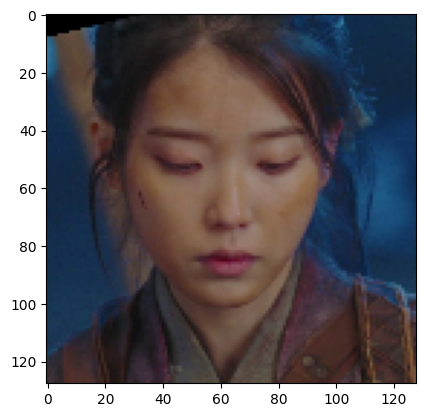

1/1 [==============================] - 0s 20ms/step
Saved predicted image as predicted_image_20231005131547.png


In [8]:
# 새로운 데이터로 예측 수행
image_path = "C:\\Myfolder\\AI_tools\\dfl\\faceset\\00318_0.jpg"  # 이미지 파일의 경로를 지정하세요

# 이미지 불러오기
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))  # 원하는 크기로 조정 (예: 224x224)
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0

plt.imshow(image)
plt.show()

predicted_image = vae.predict(image.reshape(1,resize_width, resize_height, 3))

    # 현재 시각을 포함한 파일 이름 생성
current_time = datetime.datetime.now()
timestamp = current_time.strftime("%Y%m%d%H%M%S")
save_path = f'predicted_image_{timestamp}.png'

    # 이미지를 파일로 저장
plt.imshow(predicted_image[0])
plt.savefig(save_path)
plt.close()  # 이미지 플롯 닫기

print(f'Saved predicted image as {save_path}')